In [83]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Basic information

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Preprocessing data

In [8]:
# cleaning data
# check missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# check skewness and distributions of each column
heart_data.skew()


age        -0.248866
sex        -0.851449
cp          0.529455
trestbps    0.739768
chol        1.074073
fbs         1.971339
restecg     0.180440
thalach    -0.513777
exang       0.692655
oldpeak     1.210899
slope      -0.479134
ca          1.261189
thal       -0.524390
target     -0.052778
dtype: float64

In [17]:
heart_data['age']

0       52
1       53
2       70
3       61
4       62
        ..
1020    59
1021    60
1022    47
1023    50
1024    54
Name: age, Length: 1025, dtype: int64

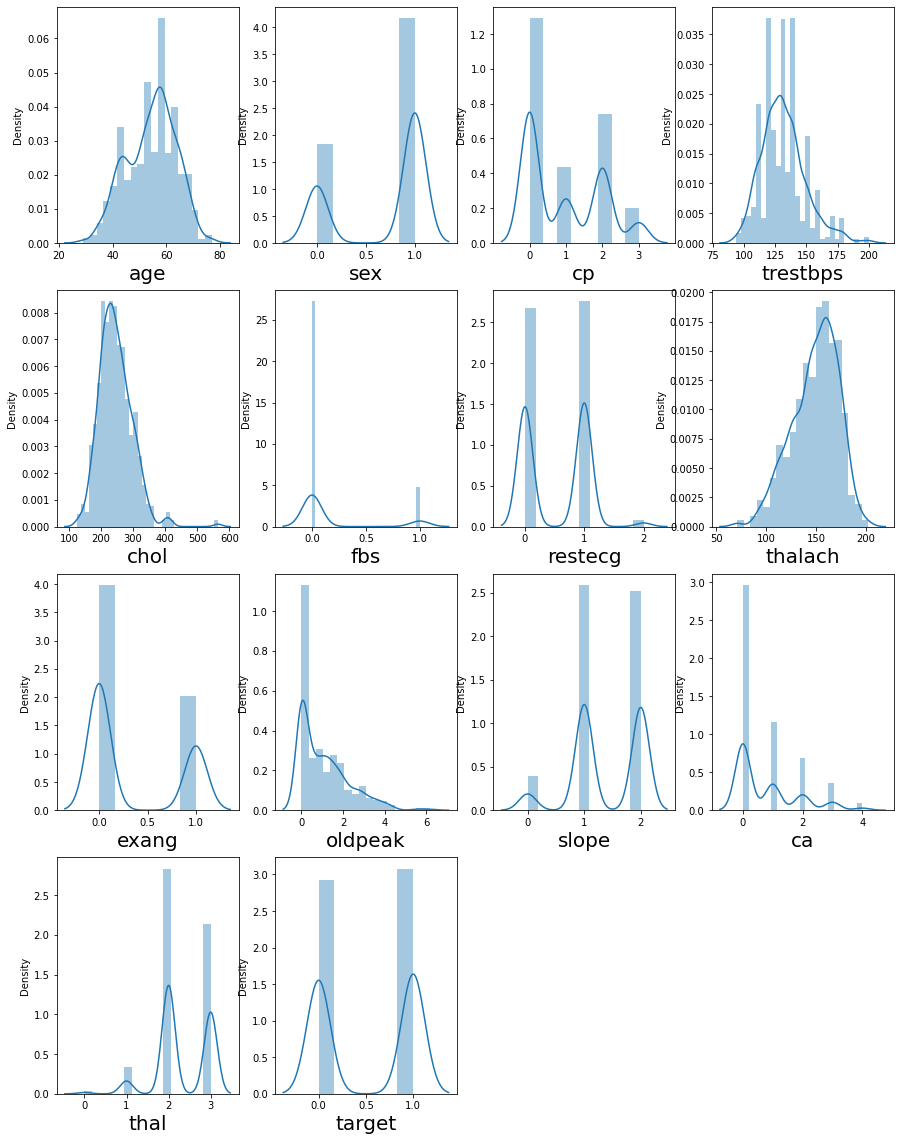

In [27]:
# checking distribution by visualizing
plt.figure(figsize=(15,20))
plotnumber = 1

for column in heart_data.columns:
    if plotnumber < 15:
        plt.subplot(4,4,plotnumber)
        sns.distplot(heart_data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()    

In [40]:
# detecting outliers using describe() function and boxplot
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


from above output we can see there is a big difference in chol 75% to max (275 to 564) similarly we can see in thalch,trestbps so it indicated there is an outliers

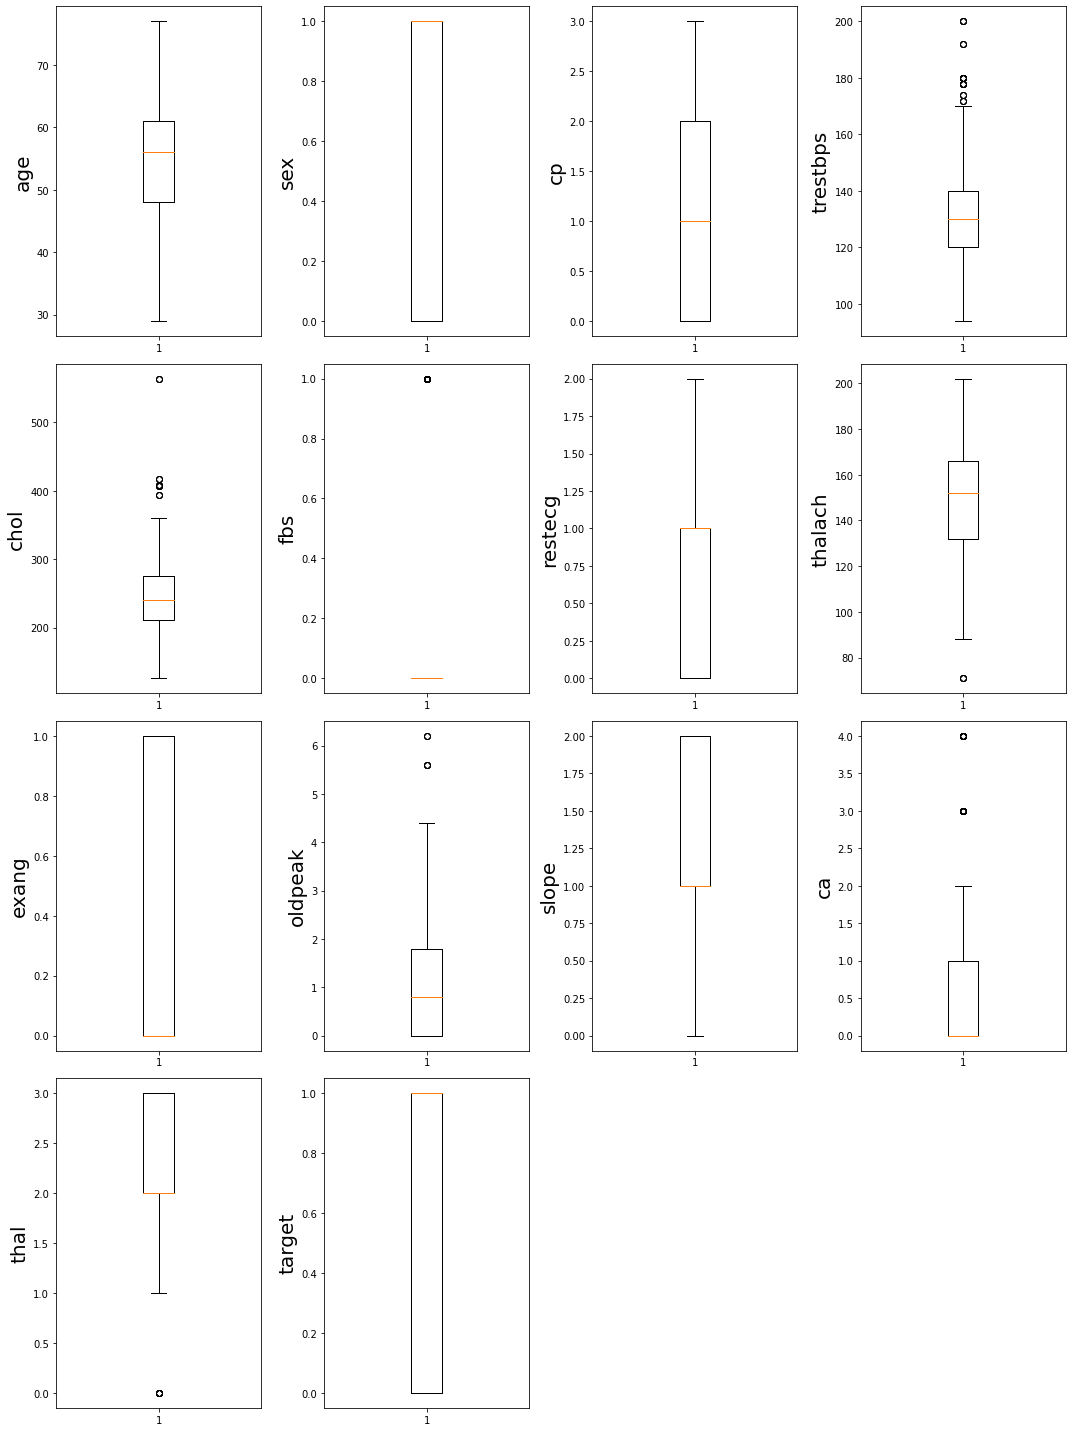

In [39]:
#visualize outliers
plt.figure(figsize=(15,20))
plotnumber = 1

for column in heart_data.columns:
    if plotnumber < 15:
        plt.subplot(4,4,plotnumber)
        plt.boxplot(heart_data[column])
        plt.ylabel(column, fontsize=20)
    plotnumber +=1
plt.tight_layout() 

IQR_upper_limit for column trestbps: 170
IQR_lower_limit for column trestbps: 90
Outliers on right side in trestbps is 
 29     180
47     178
87     174
137    180
151    192
175    200
229    178
246    192
257    180
294    200
326    192
343    172
396    180
436    174
452    178
496    180
508    200
509    180
528    178
609    180
624    178
636    174
679    180
688    200
837    172
891    180
896    178
944    178
971    172
986    180
Name: trestbps, dtype: int64


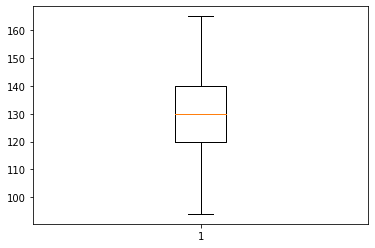

In [47]:
# removing outliers from trestbps
q3 = heart_data['trestbps'].quantile(q=0.75)
q1 = heart_data['trestbps'].quantile(q=0.25)
IQR = q3-q1
# deviring bounderies of outliers
IQR_lower_limit = int(q1-1.5*IQR)
IQR_upper_limit = int(q3+1.5*IQR)
print('IQR_upper_limit for column trestbps:', IQR_upper_limit)
print('IQR_lower_limit for column trestbps:', IQR_lower_limit)
# find and treating outliers-both lower and upper end
k1 = heart_data[heart_data['trestbps']>IQR_upper_limit]
print('Outliers on right side in trestbps is \n', k1['trestbps'])
data_cleaned = heart_data[heart_data['trestbps']<IQR_upper_limit]
#visualize clean data
plt.boxplot(data_cleaned['trestbps'])
plt.show()

IQR_upper_limit for column chol: 371
IQR_lower_limit for column chol: 115
Outliers on right side in chol is 
 123    417
158    564
179    409
192    564
255    394
450    407
464    564
481    407
542    394
578    394
641    409
665    417
685    407
889    407
958    417
996    409
Name: chol, dtype: int64


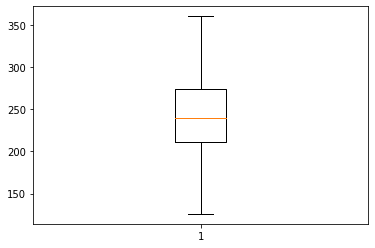

In [48]:
# Removing outliers from chol columns
q3 = heart_data['chol'].quantile(q=0.75)
q1 = heart_data['chol'].quantile(q=0.25)
IQR = q3-q1
# deviring bounderies of outliers
IQR_lower_limit = int(q1-1.5*IQR)
IQR_upper_limit = int(q3+1.5*IQR)
print('IQR_upper_limit for column chol:', IQR_upper_limit)
print('IQR_lower_limit for column chol:', IQR_lower_limit)
# find and treating outliers-both lower and upper end
k1 = heart_data[heart_data['chol']>IQR_upper_limit]
print('Outliers on right side in chol is \n', k1['chol'])
data_cleaned = heart_data[heart_data['chol']<IQR_upper_limit]
#visualize clean data
plt.boxplot(data_cleaned['chol'])
plt.show()

IQR_upper_limit for column oldpeak: 4
IQR_lower_limit for column oldpeak: -2
Outliers on right side in oldpeak is 
 6       318
13      298
54      217
55      217
69      164
150     318
393     164
482     298
526     164
528     270
613     217
624     270
661     318
787     298
833     217
896     270
1013    318
Name: chol, dtype: int64


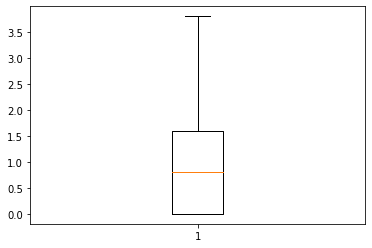

In [49]:
# Removing outlier from oldpeak column
q3 = heart_data['oldpeak'].quantile(q=0.75)
q1 = heart_data['oldpeak'].quantile(q=0.25)
IQR = q3-q1
# deviring bounderies of outliers
IQR_lower_limit = int(q1-1.5*IQR)
IQR_upper_limit = int(q3+1.5*IQR)
print('IQR_upper_limit for column oldpeak:', IQR_upper_limit)
print('IQR_lower_limit for column oldpeak:', IQR_lower_limit)
# find and treating outliers-both lower and upper end
k1 = heart_data[heart_data['oldpeak']>IQR_upper_limit]
print('Outliers on right side in oldpeak is \n', k1['chol'])
data_cleaned = heart_data[heart_data['oldpeak']<IQR_upper_limit]
#visualize clean data
plt.boxplot(data_cleaned['oldpeak'])
plt.show()

IQR_upper_limit for column thalach: 217
IQR_lower_limit for column thalach: 81
Outliers on right side in thalach is 
 Series([], Name: chol, dtype: int64)


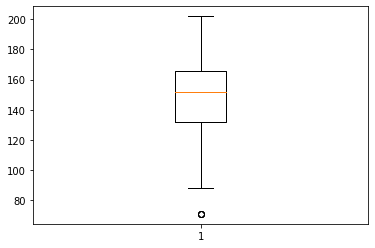

In [50]:
#removing outliers from thalach column
q3 = heart_data['thalach'].quantile(q=0.75)
q1 = heart_data['thalach'].quantile(q=0.25)
IQR = q3-q1
# deviring bounderies of outliers
IQR_lower_limit = int(q1-1.5*IQR)
IQR_upper_limit = int(q3+1.5*IQR)
print('IQR_upper_limit for column thalach:', IQR_upper_limit)
print('IQR_lower_limit for column thalach:', IQR_lower_limit)
# find and treating outliers-both lower and upper end
k1 = heart_data[heart_data['thalach']>IQR_upper_limit]
print('Outliers on right side in thalach is \n', k1['chol'])
data_cleaned = heart_data[heart_data['thalach']<IQR_upper_limit]
#visualize clean data
plt.boxplot(data_cleaned['thalach'])
plt.show()

In [53]:
# check shape data 
data_cleaned.shape

(1025, 14)

#Checking relationship of features with target and with each other
    * Correlation
    * Multicollinearity

<AxesSubplot:>

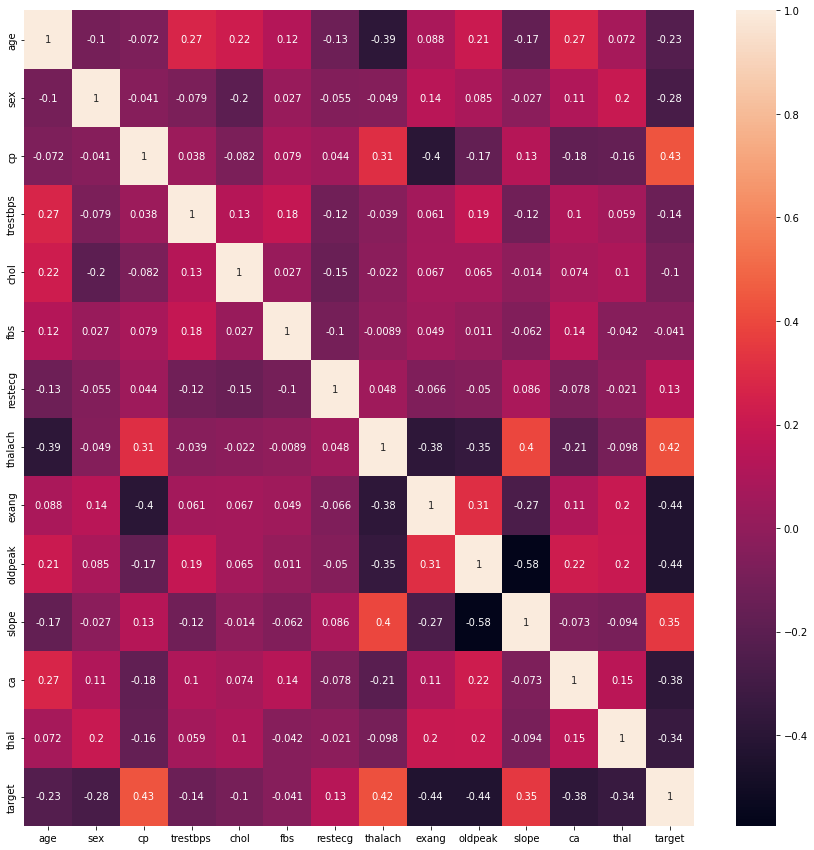

In [57]:
#correlation
plt.figure(figsize=(15,15))
sns.heatmap(data_cleaned.corr(), annot=True)

# check multicollinearity


In [71]:
#For multicoolinearity we need to do scaling on features so first seggregate features and target
X = data_cleaned.drop(columns=['target'])
y = data_cleaned['target']

In [74]:
#scaling feature
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)
x_scaled

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [75]:
#computing variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Feature'] = x.columns
vif

,vif,Feature
0,1.428872,age
1,1.155948,sex
2,1.293277,cp
3,1.167890,trestbps
4,1.146047,chol
5,1.090063,fbs
6,1.064442,restecg
7,1.615182,thalach
8,1.419047,exang
9,1.708555,oldpeak


1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.
here vif of all features are less than 5 so it means that no multicollinearity exist so we consider all features are significant for prediction model

In [78]:
#dividing the data set into training and test data
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2, random_state=355)

In [79]:
# Modelling using logistic classification algorithm
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

# Prediction

In [80]:
# Predict of test data
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0], dtype=int64)

# Model Evaluation Metrics

In [84]:
# 1. confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[82, 11],
       [15, 97]], dtype=int64)

type 1 error is 11 i.e when people were not actually having heart disease but model predicted they had

type 2 error : 15 i.e i.e when people were actually having heart disease but model predicted they had not

In [86]:
# 2. accuracy of model
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.8731707317073171

Model Accuracy is 87.3 % i.e correct predictions done by Model

In [87]:
# 3. precision
true_positive = conf_mat[0][0]
false__positive = conf_mat[0][1]
true_negative = conf_mat[1][0]
false_negative = conf_mat[1][1]
precision = true_positive/(true_positive+false__positive)
precision

0.8817204301075269

In [90]:
# 4. Recall
recall = true_positive/(true_positive+false_negative)
recall

0.4581005586592179

In [91]:
# F1 Score
f1_score = 2*(recall/precision)/(recall+precision)
f1_score

0.7755559540889527

# ROC(Receiver Operating Characteristic Curve) and Area under curve(auc)

In [92]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8738959293394777

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


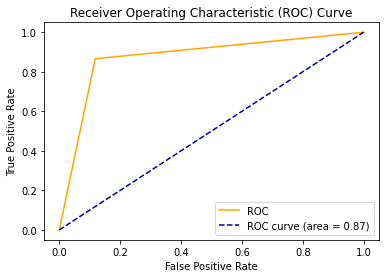

In [94]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Conclusion :

Accuracy of model : 85.7 using logistic regression algorithm

AUC - 0.862

We may use others prediction model in order to compare the accuracy and AUC of the model , the model which gives highest AUC value will be the best model to use for this data .